In [1]:
import sys

# append root project directory so packages will be available
sys.path.append('../..')

In [2]:
import scipy
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import skimage

import src.utility.generate_dataset as generate_dataset


IMG_PATH = '/home/jakub/Datasets/mpii/'
ANNOTATION_PATH = '../../data/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat'
column_names = ['name', 'activity', 'category', 'person_count', 'train']

In [3]:
dataset2 = pd.DataFrame(generate_dataset.load_dataset(ANNOTATION_PATH), columns=column_names)

In [4]:
dataset = pd.read_csv('test.csv', index_col=0)

In [5]:
dataset2 = dataset2[dataset2.person_count == 1]

In [6]:
dataset2.activity.unique()

array([None, 'curling',
       'truck driving, loading and unloading truck, tying down load, standing, walking and carrying heavy lo',
       'swimming, synchronized', 'scrubbing floors',
       'mopping, standing, light effort',
       'chambermaid, hotel housekeeper, making bed, cleaning bathroom, pushing cart',
       'cleaning, general',
       'implied walkingstanding - picking up yard, light, picking flowers or vegetables',
       'gardening, general, moderate effort',
       'standing, talking in person', 'lawn bowling, bocce ball, outdoor',
       'serving food in church', 'skiing, downhill',
       'skiing, cross-country', 'skiing, climbing up',
       'horse grooming, feeding, cleaning, harnessing and unharnessing',
       'horse cart, driving, standing or sitting',
       'video exercise workouts, TV conditioning programs',
       'bicycling, general', 'hacky sack', 'shoveling snow, by hand',
       'fishing, general', 'ironing',
       'therapeutic exercise ball, Fitball ex

In [7]:
dataset2[dataset2.activity == 'standing, talking in person']

,name,activity,category,person_count,train
83,006355835.jpg,"standing, talking in person",miscellaneous,1,1
84,031098232.jpg,"standing, talking in person",miscellaneous,1,1
850,006707648.jpg,"standing, talking in person",miscellaneous,1,1
852,020990559.jpg,"standing, talking in person",miscellaneous,1,1
1300,003158614.jpg,"standing, talking in person",miscellaneous,1,1
2410,068827424.jpg,"standing, talking in person",miscellaneous,1,1
2412,048558970.jpg,"standing, talking in person",miscellaneous,1,1
2415,096401741.jpg,"standing, talking in person",miscellaneous,1,1
5187,036340393.jpg,"standing, talking in person",miscellaneous,1,1
6958,070262958.jpg,"standing, talking in person",miscellaneous,1,1


In [74]:
testim = cv2.cvtColor(cv2.imread(IMG_PATH + "000360424.jpg", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

In [75]:
testim_x, testim_y, testim_c = testim.shape

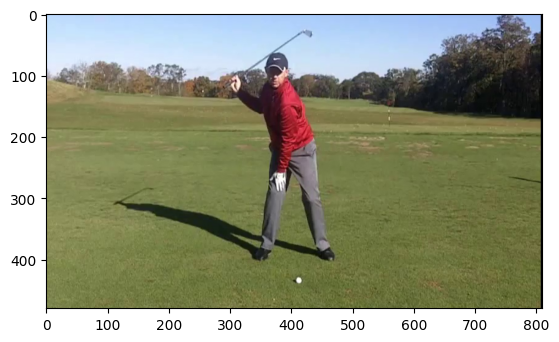

In [76]:
plt.imshow(testim)

In [77]:
testim.shape

(480, 810, 3)

In [78]:
current_img_data = dataset[dataset.NAME == "000360424.jpg"].to_dict()

In [79]:
current_img_data

{'NAME': {0: '000360424.jpg'},
 'r ankle_X': {0: 358},
 'r ankle_Y': {0: 379},
 'r knee_X': {0: 374},
 'r knee_Y': {0: 288},
 'r hip_X': {0: 385},
 'r hip_Y': {0: 211},
 'l hip_X': {0: 422},
 'l hip_Y': {0: 209},
 'l knee_X': {0: 435},
 'l knee_Y': {0: 300},
 'l ankle_X': {0: 453},
 'l ankle_Y': {0: 381},
 'pelvis_X': {0: 404},
 'pelvis_Y': {0: 210},
 'thorax_X': {0: 382},
 'thorax_Y': {0: 125},
 'upper neck_X': {0: 381.3887},
 'upper neck_Y': {0: 120.9651},
 'head top_X': {0: 372.6113},
 'head top_Y': {0: 63.0349},
 'r wrist_X': {0: 313},
 'r wrist_Y': {0: 125},
 'r elbow_X': {0: 350},
 'r elbow_Y': {0: 154},
 'r shoulder_X': {0: 370},
 'r shoulder_Y': {0: 109},
 'l shoulder_X': {0: 393},
 'l shoulder_Y': {0: 141},
 'l elbow_X': {0: 394},
 'l elbow_Y': {0: 201},
 'l wrist_X': {0: 381},
 'l wrist_Y': {0: 258},
 'Scale': {0: 1.7577440086656533},
 'Activity': {0: 'golf'},
 'Category': {0: 'sports'}}

In [ ]:
head = (current_img_data["head top_Y"][0], current_img_data["head top_X"][0])


In [118]:
from typing import List, Tuple, Any


def scale_points(size: Tuple, old_size: Tuple, points: List[Tuple]):
    old_y, old_x = old_size
    new_y, new_x = size

    ratio_x = new_x / old_x
    ratio_y = new_y / old_y

    output_list = []

    for point in points:
        p_y, p_x = point
        output_list.append((ratio_y * p_y, ratio_x * p_x))

    return output_list


def mark_points_on_image(image, points: List[Tuple], color: Tuple = (255, 255, 255), radius = 5, thickness = 5):
    copied_img = image.copy()

    for point in points:
        copied_img = cv2.circle(copied_img, (round(point[1]), round(point[0])), radius=radius, color=color, thickness=thickness)

    return copied_img

In [147]:
testim2 = testim.copy()

In [148]:
testim2 = mark_points_on_image(testim2, [head], radius=5)

In [149]:
# testim2 = cv2.circle(testim2, (head_x, head_y), radius=5, color=(255, 255, 255), thickness=5)

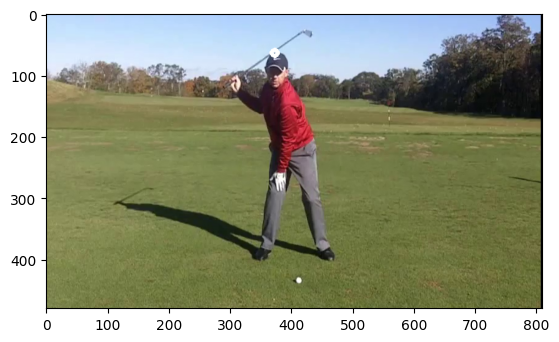

In [150]:
plt.imshow(testim2)

In [151]:
testim3 = testim.copy()

In [152]:
oy, ox, oc = testim3.shape

In [153]:
testim3 = cv2.resize(testim3, (256, 256))
testim4 = testim3.copy()

In [154]:
original_y, original_x, _ = testim.shape
new_y, new_x, _ = testim3.shape

In [155]:
new_pos = scale_points((new_y, new_x), (original_y, original_x), [(head_y, head_x)])

In [156]:
new_pos = new_pos[0]
new_head_y, new_head_x = new_pos

In [157]:
testim3 = cv2.circle(testim3, (round(new_head_x), round(new_head_y)), radius=5, color=(255, 255, 255), thickness=5)

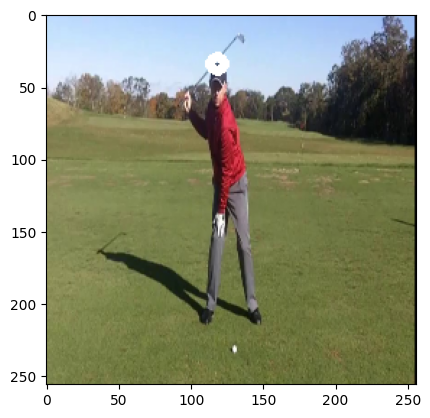

In [158]:
plt.imshow(testim3)

In [159]:

oy, ox, _ = testim3.shape
testim4 = cv2.resize(testim4, (testim_y, testim_x))
ny, nx, _ = testim4.shape

new_old_pos = scale_points((ny, nx), (oy, ox), [(new_head_y, new_head_x)])


nhead_y2, nhead_x2 = new_old_pos[0]
print(nhead_x2, nhead_y2)

373.0 63.0


In [160]:
testim4 = cv2.circle(testim4, (round(nhead_x2), round(nhead_y2)), radius=5, color=(255, 255, 255), thickness=5)

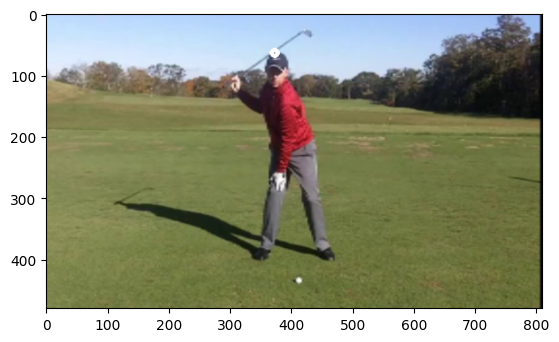

In [161]:
plt.imshow(testim4)